In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
x1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
y1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Cluster Number 1901-2010.csv",index_col=0)
x2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
y2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Cluster Number 2011-2022.csv",index_col=0)


In [4]:
x=pd.concat([x1,x2])
x=x.set_index(i for i in range(122))
y=pd.concat([y1,y2])
y=y.set_index(i for i in range(122))

In [7]:
# x_train=x[:110]
# x_test=x[110:]
# y_train=y[:110]
# y_test=y[110:]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred = model.predict(x_test)
y_pred

array([2, 3, 2, 6, 6, 3, 0, 6, 3, 3, 3, 0, 8], dtype=int64)

In [11]:
y_array = y_test.values.ravel()
y_array

array([3, 3, 2, 3, 1, 1, 3, 1, 3, 8, 3, 4, 2], dtype=int64)

In [12]:
accuracy_score(y_pred,y_array)

0.3076923076923077

In [13]:
clusters=[]
for i in range(1,10):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\IMD Rainfall Clusters Images\Cluster {i}.png"))
    

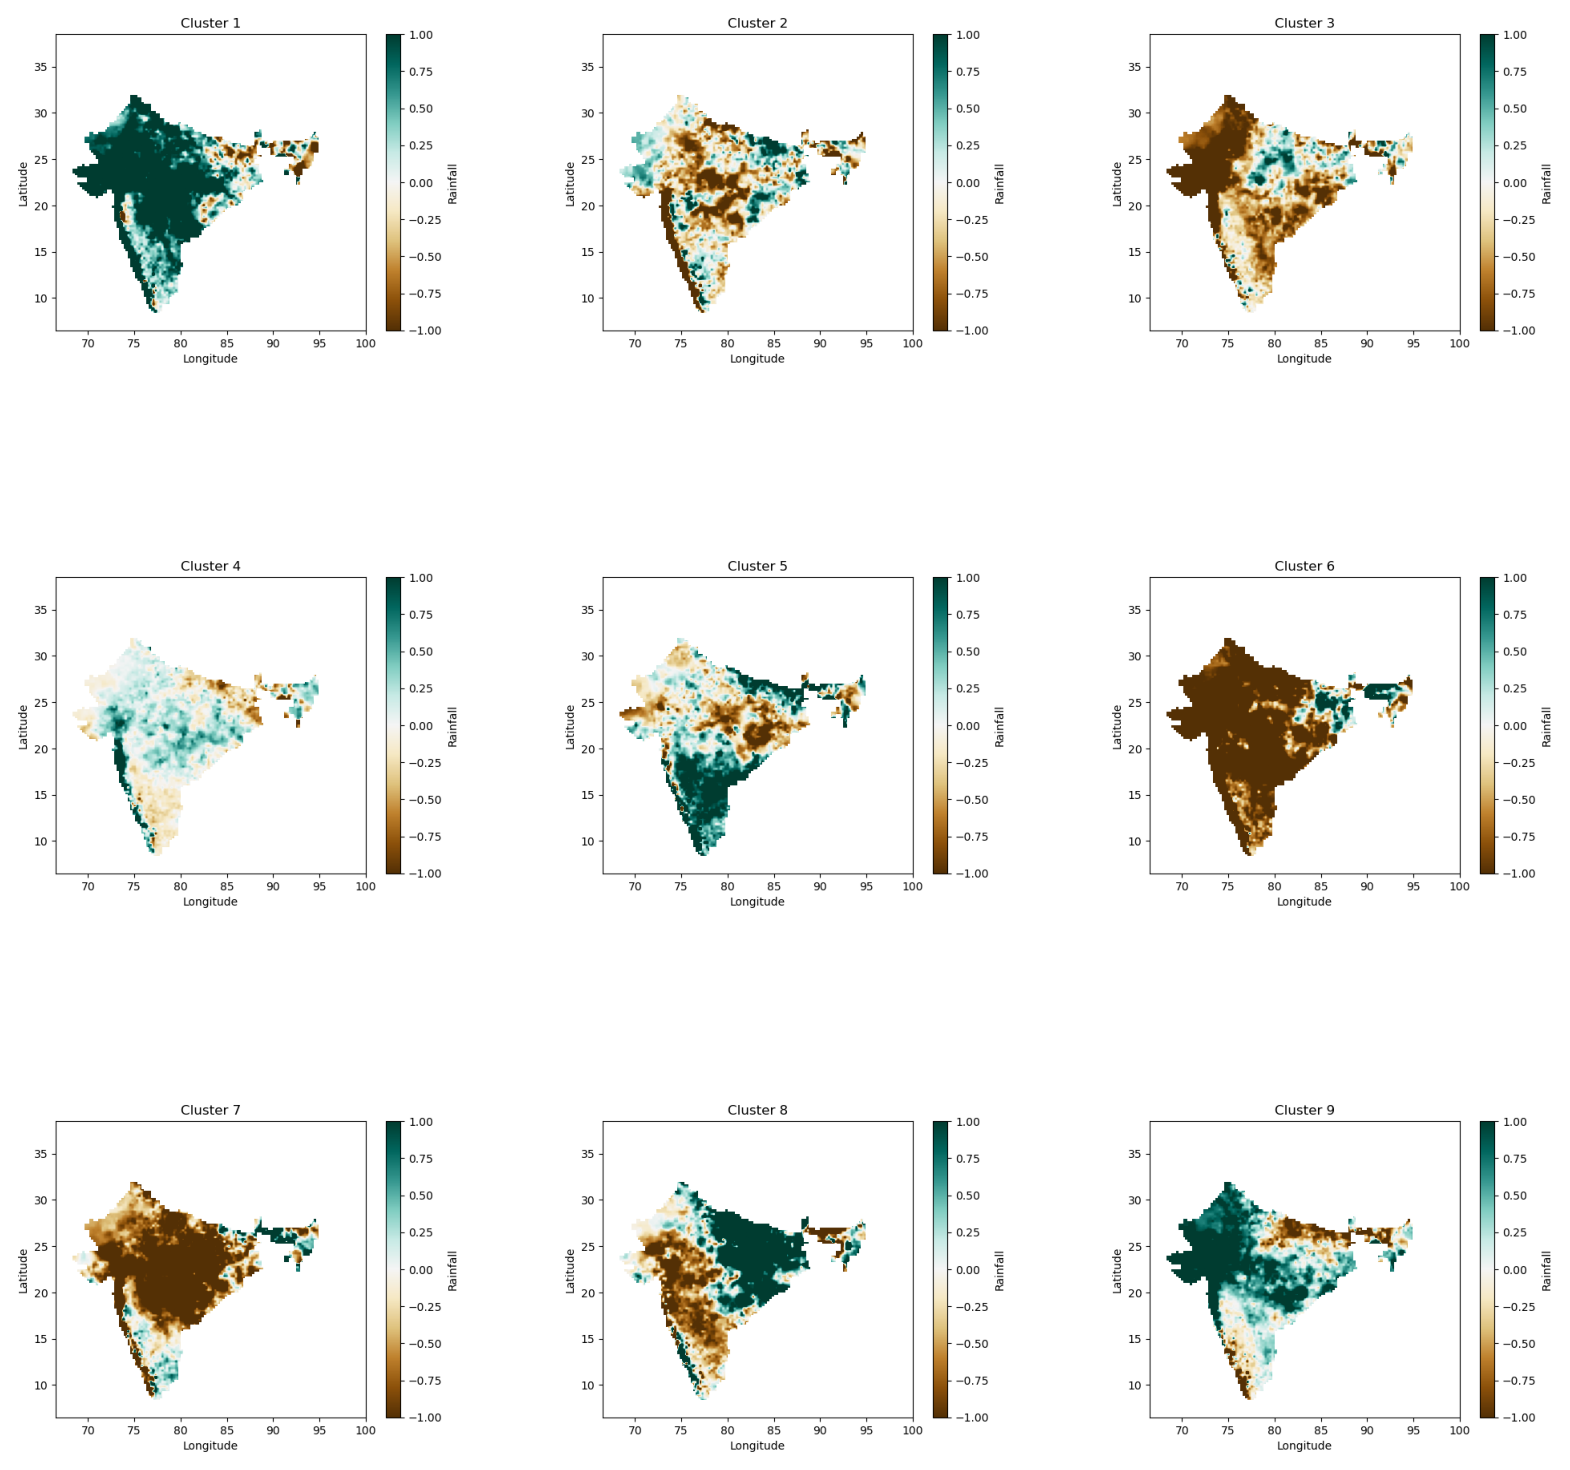

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off') 

In [15]:
indexes_list = y_test.index.tolist()
indexes_list

[18, 45, 47, 89, 4, 40, 62, 107, 31, 55, 53, 119, 10]

In [17]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{i+1901} Rainfall.png"))
                        

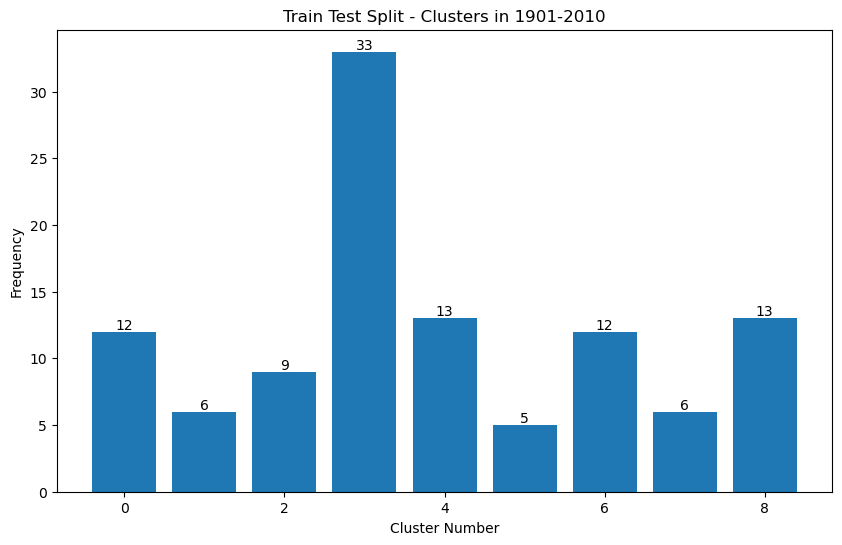

In [18]:
cluster_counts = y_train['Cluster Number'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars1=plt.bar(cluster_counts.index, cluster_counts.values)
plt.title("Train Test Split - Clusters in 1901-2010")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars1, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
    
# plt.savefig('Train Test Split - Clusters in 1901-2010.png')

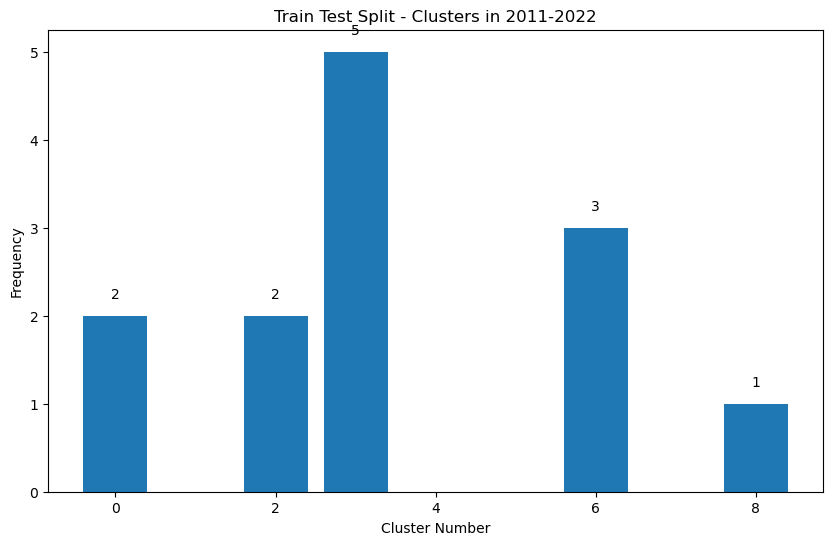

In [19]:
unique_values, value_counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(10, 6))  # Set the figure size
bars=plt.bar(unique_values, value_counts)
plt.title("Train Test Split - Clusters in 2011-2022")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
# plt.savefig('Train Test Split - Clusters in 2011-2022.png')


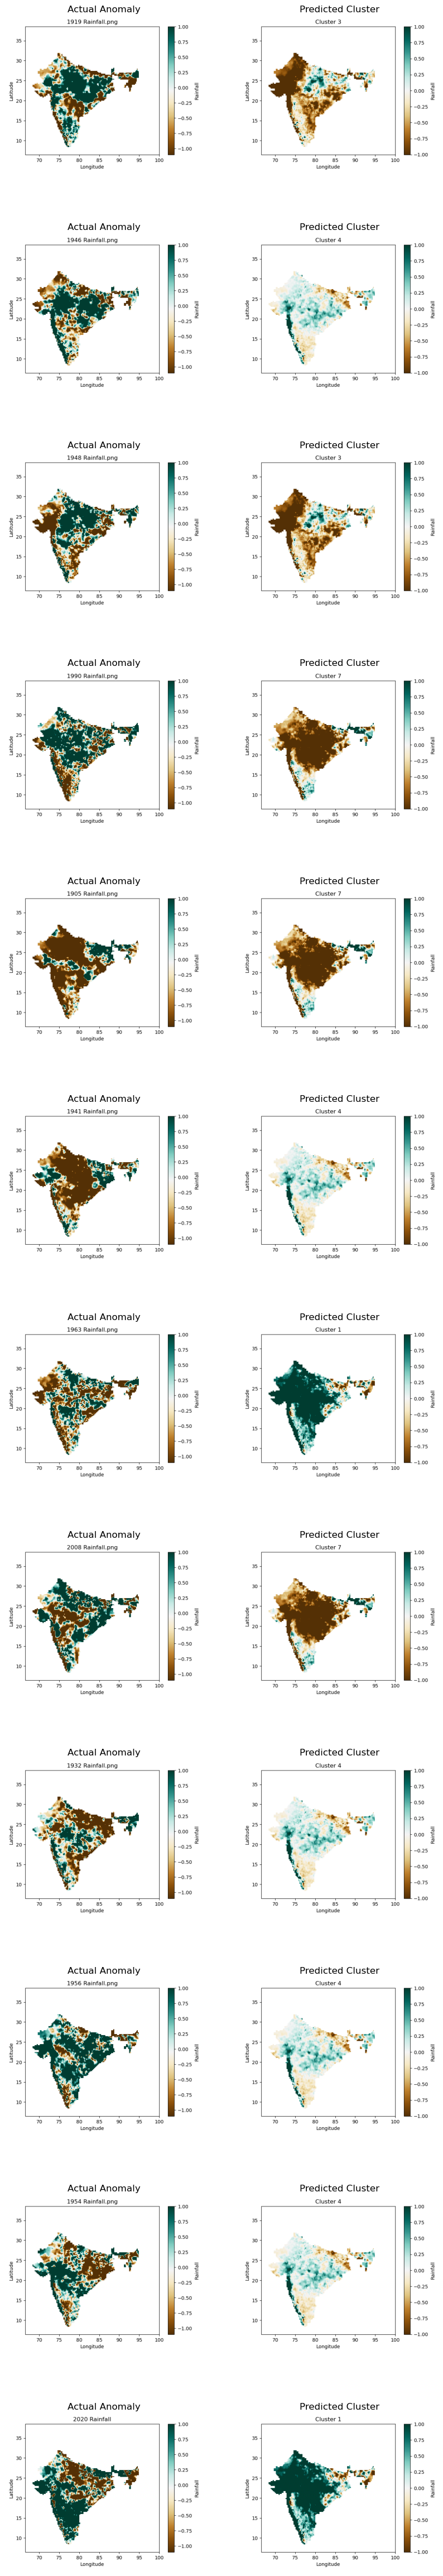

In [21]:
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


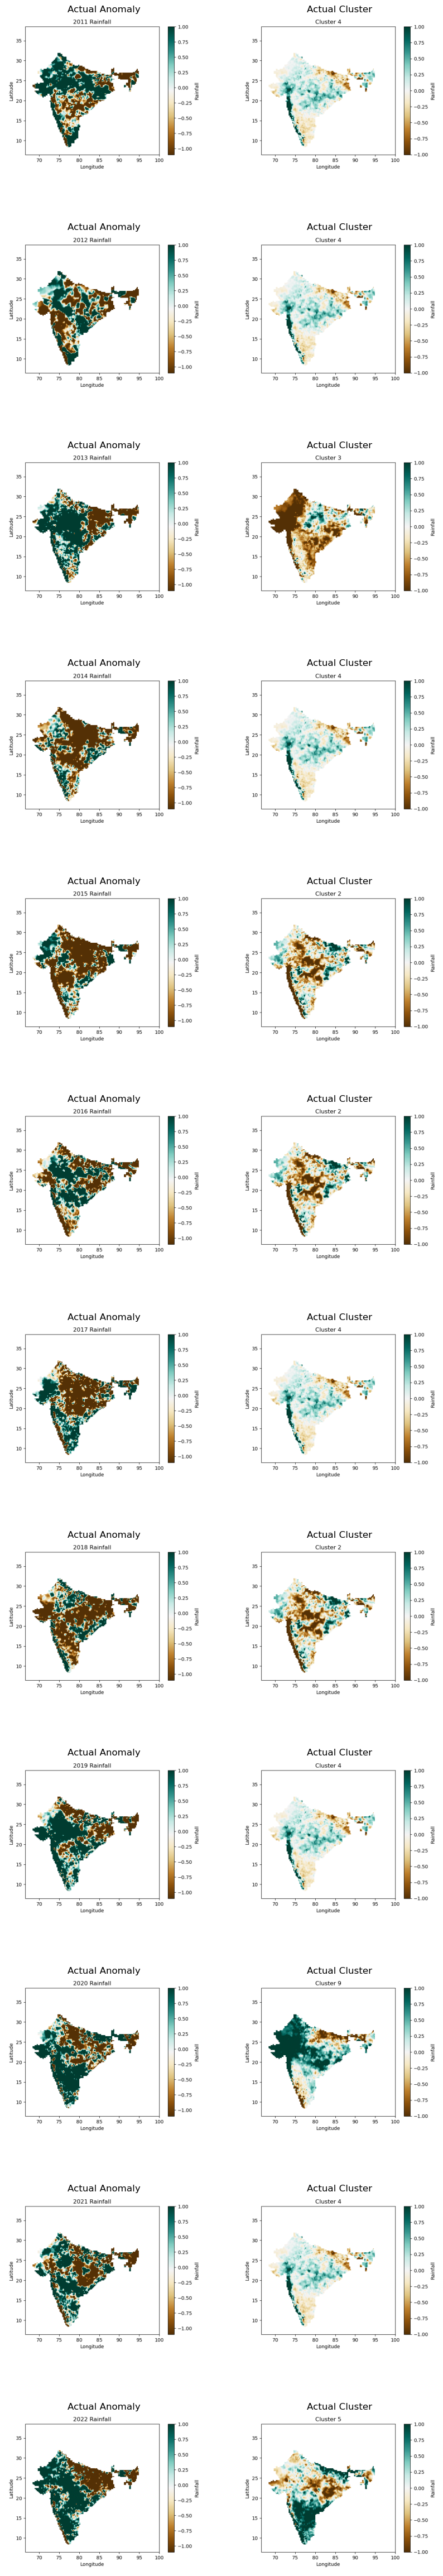

In [31]:
#Actual Years
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

In [ ]:
# fig, axes = plt.subplots(2, 12, figsize=(100, 10)) 
# j=0
# k=0
# for i, ax in enumerate(axes.ravel()):
    
#     if(i>=12):
#         pred_clus=y_pred[k]
#         ax.imshow(clusters[pred_clus])
#         ax.axis('off')
#         ax.set_title(f'Predicted Cluster')
#         k+=1
#     else:
#         ax.imshow(actual_years_map[j])
#         ax.axis('off')
#         ax.set_title('Actual Anomaly')
#         j+=1

# #plt.savefig('Train Test Split - Prediction.png')


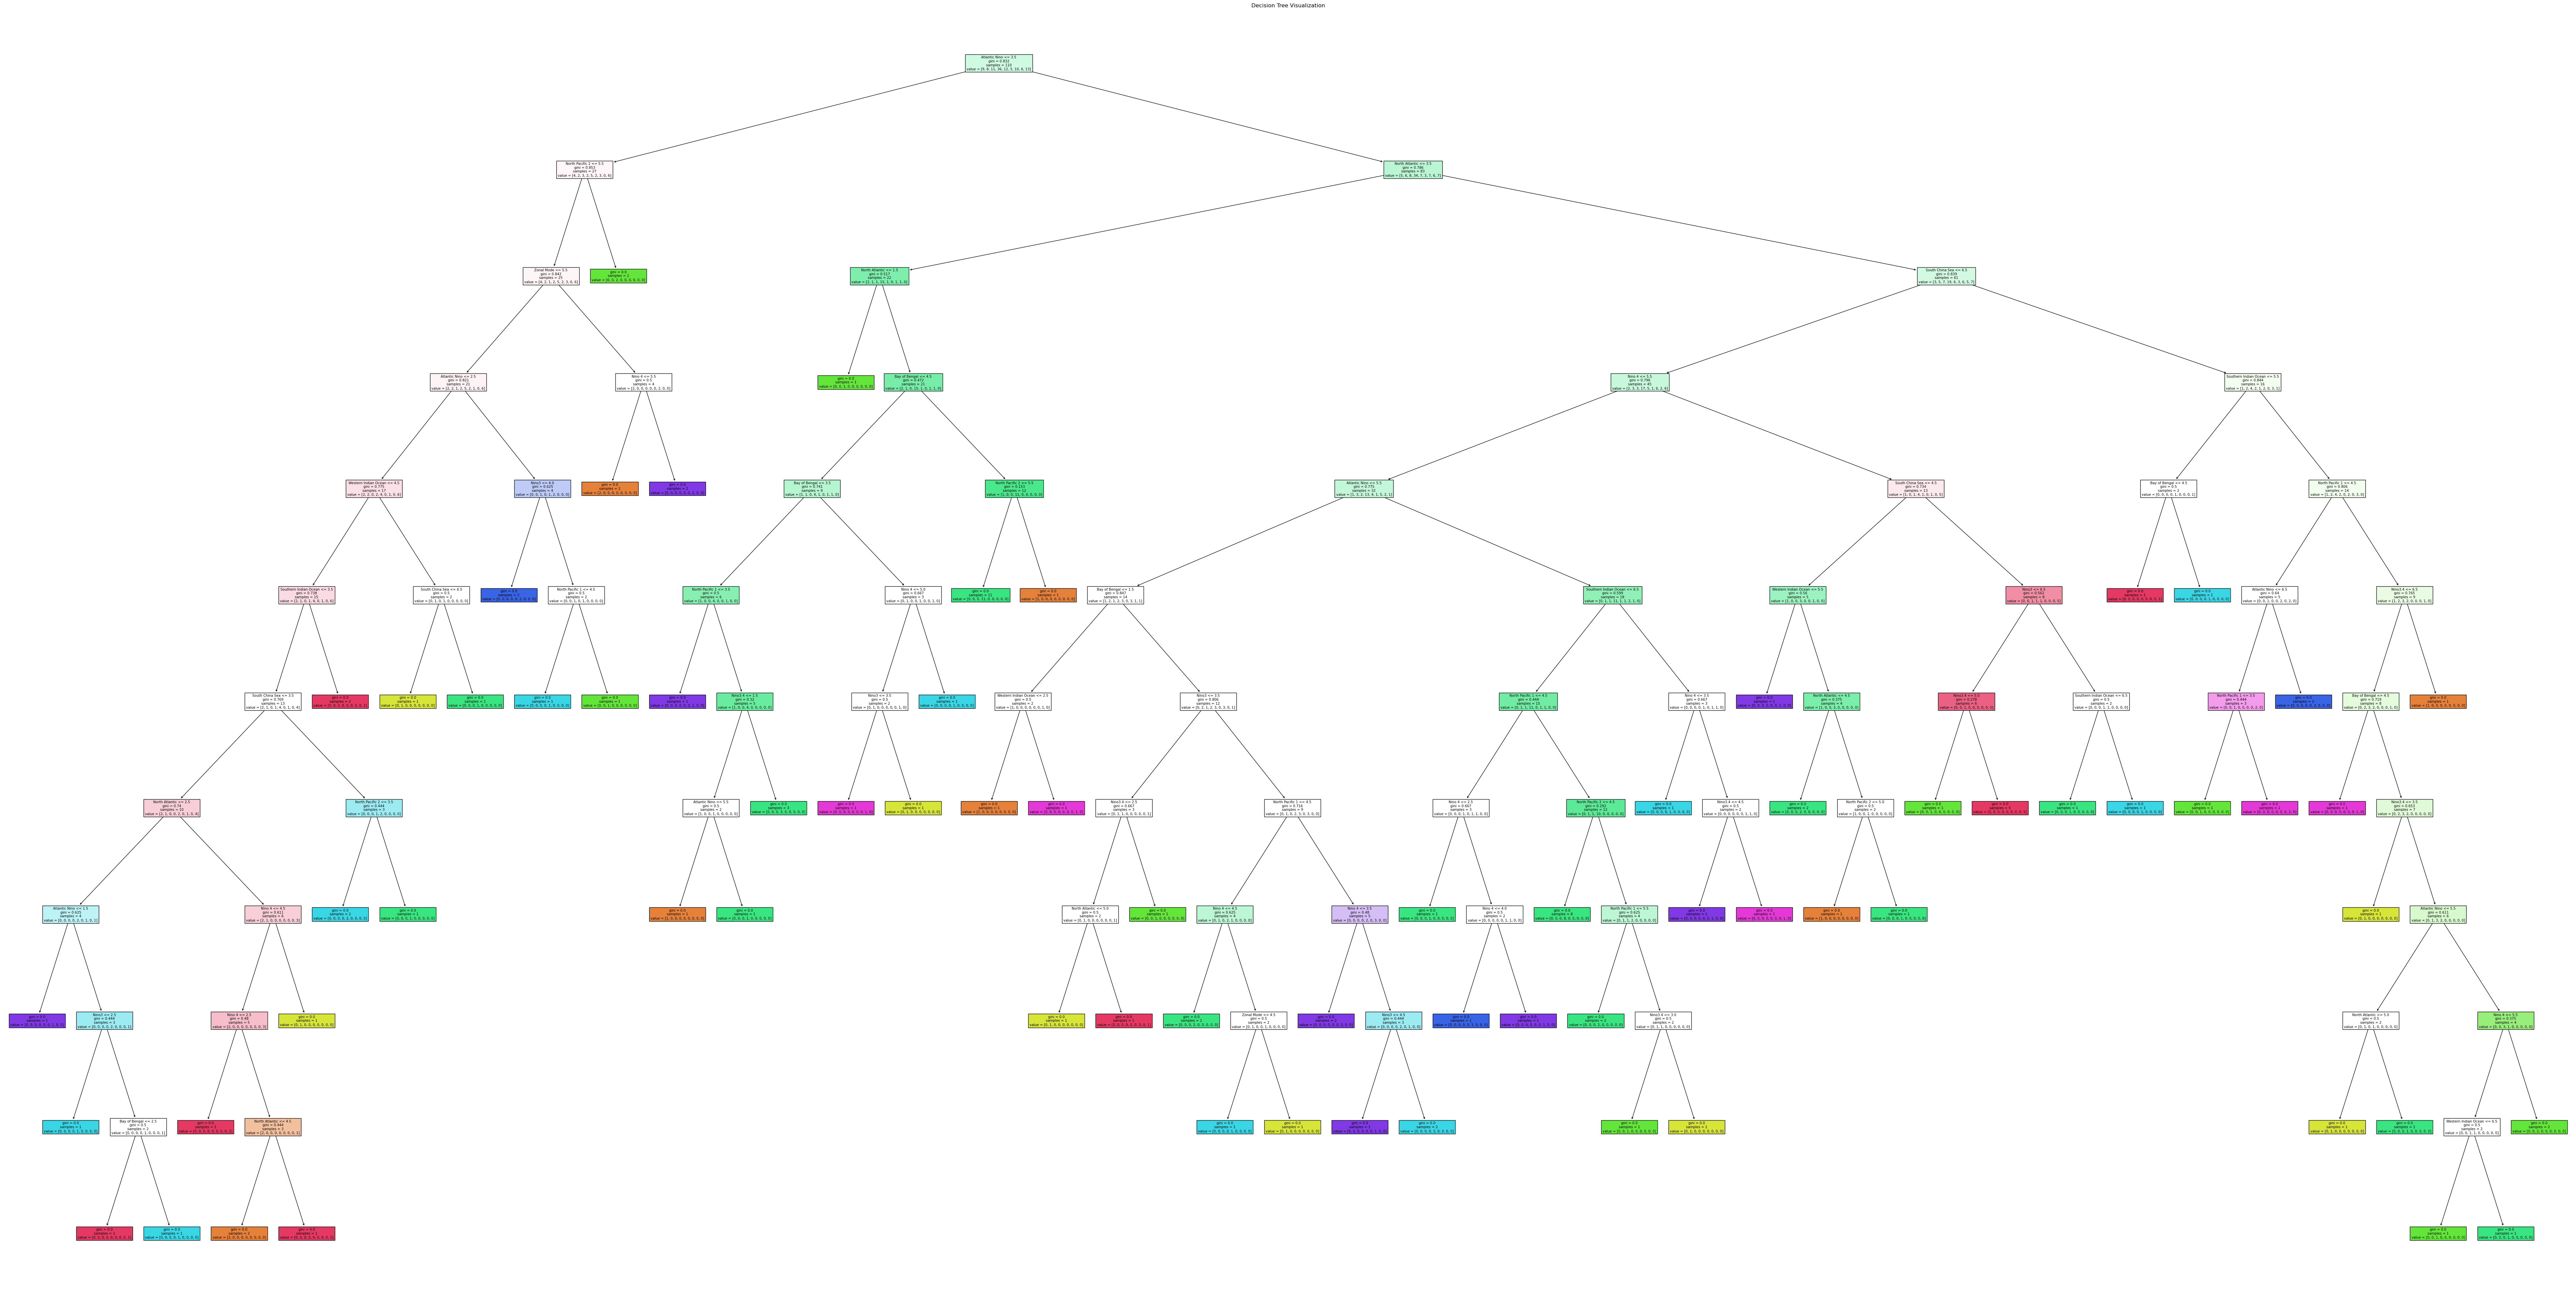

In [30]:
# Assuming you've already trained your Decision Tree classifier (clf)

cols=['Atlantic Nino', 'Bay of Bengal', 'Zonal Mode', 'Nino3', 'Nino3.4', 'Nino 4', 'North Atlantic', 'North Pacific 1', 'North Pacific 2', 'South China Sea', 'Southern Indian Ocean', 'Western Indian Ocean']


plt.figure(figsize=(100, 50))
tree.plot_tree(model, filled=True, feature_names=cols)
plt.title("Decision Tree Visualization")
#plt.savefig(f'CART.png', dpi=100, bbox_inches='tight')

plt.show()


In [3]:
x_train

region1  region2  region3  region4  region5  region6  region7  region8  \
0          6        7        6        6        5        4        5        5   
1          7        7        7        3        3        4        6        6   
2          7        6        7        5        4        3        7        6   
3          7        7        7        6        6        6        6        4   
4          7        7        7        2        2        4        6        7   
..       ...      ...      ...      ...      ...      ...      ...      ...   
105        2        1        2        4        4        4        2        4   
106        3        4        1        5        4        2        2        4   
107        2        3        5        5        6        6        1        3   
108        1        1        1        4        4        4        2        2   
109        1        1        1        3        2        2        4        3   

     region9  region10  region11  region12  
0          4         7         6         6  
1          5         6         7         7  
2          6         4         7         7  
3          7         7         7         7  
4          6         7         7         7  
..       ...       ...       ...       ...  
105        4         2         2         2  
106        5         3         1         1  
107        5         6         4         5  
108        4         2         1         2  
109        4         1         1         1  

[110 rows x 12 columns]

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
x_train_mean = x_train.mean(axis=1)
x_train_mean

90     2.333333
109    2.000000
11     4.916667
76     4.416667
56     4.166667
115    1.583333
0      5.583333
26     5.833333
44     4.083333
66     4.916667
98     3.750000
24     6.083333
42     5.583333
105    2.750000
93     3.250000
36     4.833333
100    2.916667
12     6.250000
15     5.750000
72     3.333333
22     5.416667
116    2.000000
91     2.750000
83     4.583333
30     3.583333
77     4.583333
65     4.000000
9      6.333333
33     5.500000
25     4.000000
70     5.500000
28     5.833333
120    2.833333
111    3.416667
5      5.583333
64     5.166667
69     3.333333
39     4.250000
49     5.333333
35     5.333333
16     6.250000
67     5.333333
34     5.666667
84     4.666667
7      6.416667
43     3.833333
73     5.416667
68     2.833333
80     3.916667
27     5.416667
19     4.750000
97     1.916667
113    2.333333
8      6.250000
13     5.083333
85     4.166667
3      6.416667
17     6.000000
38     5.833333
94     2.583333
6      5.750000
78     3.166667
104    2

In [58]:
x_test_mean=x_test.mean(axis=1)
x_test_mean

18     5.250000
45     4.666667
47     5.416667
89     2.916667
4      5.750000
40     2.750000
62     4.333333
107    4.250000
31     5.416667
55     5.416667
53     5.083333
119    1.583333
10     6.583333
dtype: float64

In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
x

region1  region2  region3  region4  region5  region6  region7  region8  \
0          5        7        5        5        4        4        5        4   
1          6        7        7        3        2        3        6        6   
2          7        6        7        5        3        2        7        5   
3          7        7        7        6        6        6        6        4   
4          7        6        7        1        2        3        6        6   
5          7        4        6        5        4        4        5        5   
6          6        7        7        6        6        6        3        2   
7          7        7        7        6        6        5        6        6   
8          6        6        7        6        6        6        6        6   
9          4        7        7        7        7        7        6        4   
10         7        7        7        6        6        6        6        6   
11         4        3        6        2        2        3        7        4   
12         4        6        6        5        4        6        6        5   
13         6        6        6        2        2        2        6        4   
14         5        3        4        2        2        1        4        5   
15         4        6        6        6        6        6        3        5   
16         4        7        7        6        6        7        6        4   
17         7        7        7        5        6        6        6        2   
18         7        4        4        4        4        5        6        4   
19         4        4        4        4        4        4        4        3   
20         3        5        6        7        7        6        4        3   
21         6        6        6        5        5        4        6        4   
22         6        6        6        4        4        4        5        4   
23         2        4        6        4        4        4        5        5   
24         5        7        6        5        6        6        4        3   
25         2        3        3        2        2        3        6        6   
26         6        6        6        6        6        6        3        4   
27         6        6        6        4        4        4        5        6   
28         5        4        6        5        5        5        6        6   
29         7        6        6        4        3        3        4        4   
30         5        1        4        2        2        4        2        5   
31         7        7        6        2        4        4        4        6   
32         4        5        6        5        6        6        4        4   
33         3        7        7        6        6        6        2        4   
34         4        6        5        5        6        5        4        5   
35         6        4        4        4        4        4        4        6   
36         3        3        5        4        5        5        4        4   
37         6        4        6        6        6        6        2        4   
38         5        5        6        4        4        5        4        5   
39         4        6        4        2        2        2        3        6   
40         4        3        1        1        1        2        4        6   
41         5        5        2        4        3        2        4        5   
42         6        7        6        6        6        6        3        4   
43         1        7        3        2        3        4        2        3   
44         2        2        3        5        6        6        2        5   
45         6        5        2        4        5        4        4        6   
46         4        6        2        4        4        3        6        4   
47         6        6        5        4        4        6        5        4   
48         4        5        6        5        5        5        2        4   
49         3        6        6        6        7       